In [51]:
import pandas as pd
from extract import fetch_account_hashrate_history, fetch_transactions_list, initialize_environment

# Initialize the environment and get API credentials
api_secret, mining_user_name, currency = initialize_environment()

# Fetch the account hashrate history
history = fetch_account_hashrate_history(api_secret, mining_user_name, currency)
if history:
    history_df = pd.json_normalize(history, 'history')

# Fetch the transactions list
transactions = fetch_transactions_list(api_secret, mining_user_name, currency)
if transactions:
    transactions_df = pd.json_normalize(transactions, 'transactions')

In [52]:
def find_column_datatypes(df):
  """
  Function returns three lists of columns names based on datatype for a given pandas DataFrame df: numeric (int/float), object (string), boolean (True, False)
 
  Parameter
  -----
  df : pandas DataFrame
 
  Returns
  -----
  num_cols, cat_cols, bool_cols : lists
  """
 
  num_cols = [col for col, dtype in df.dtypes.items() if (dtype == 'int64' or dtype == 'float64')]
  obj_cols = [col for col, dtype in df.dtypes.items() if (dtype == 'object')]
  bool_cols = [col for col, dtype in df.dtypes.items() if (dtype == 'bool')]
 
  return num_cols, obj_cols, bool_cols

In [53]:
num_cols, obj_cols, bool_cols = find_column_datatypes(history_df)

In [54]:
num_cols

['timestamp',
 'hash_rate',
 'stale_hash_rate',
 'delay_hash_rate',
 'local_hash_rate',
 'normal_reward',
 'delay_reward',
 'online_miners']

In [55]:
import matplotlib.pyplot as plt

-----  timestamp  -----
count    1.450000e+02
mean     1.698799e+09
std      2.520119e+04
min      1.698755e+09
25%      1.698777e+09
50%      1.698799e+09
75%      1.698820e+09
max      1.698842e+09
Name: timestamp, dtype: float64


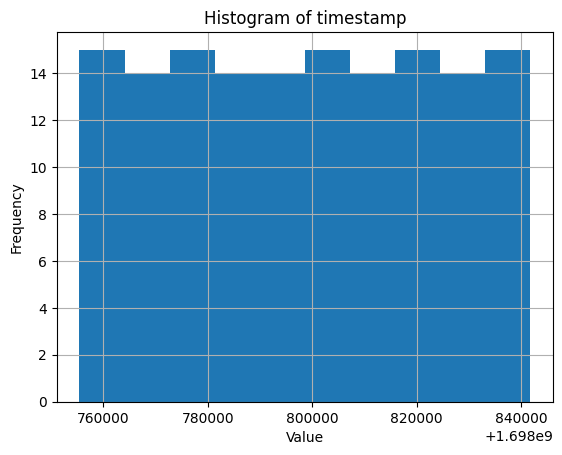



-----  hash_rate  -----
count    1.450000e+02
mean     6.047830e+13
std      2.591178e+13
min      0.000000e+00
25%      5.301112e+13
50%      6.755399e+13
75%      7.505999e+13
max      1.050840e+14
Name: hash_rate, dtype: float64


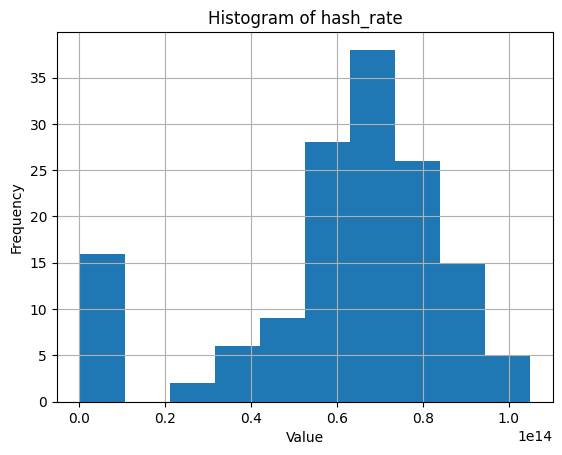



-----  stale_hash_rate  -----
count    1.450000e+02
mean     2.588276e+10
std      3.116697e+11
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      3.753000e+12
Name: stale_hash_rate, dtype: float64


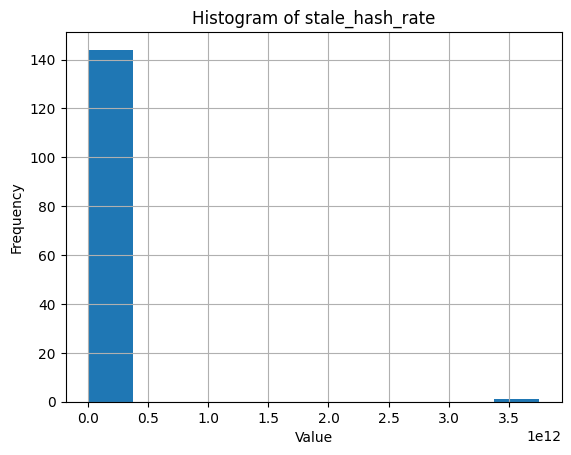



-----  delay_hash_rate  -----
count    145.0
mean       0.0
std        0.0
min        0.0
25%        0.0
50%        0.0
75%        0.0
max        0.0
Name: delay_hash_rate, dtype: float64


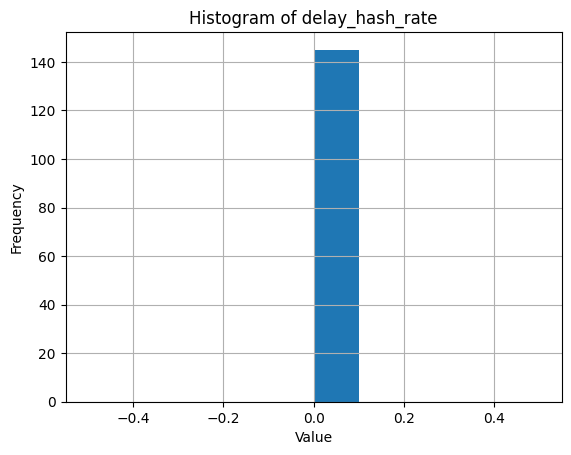



-----  local_hash_rate  -----
count    145.0
mean       0.0
std        0.0
min        0.0
25%        0.0
50%        0.0
75%        0.0
max        0.0
Name: local_hash_rate, dtype: float64


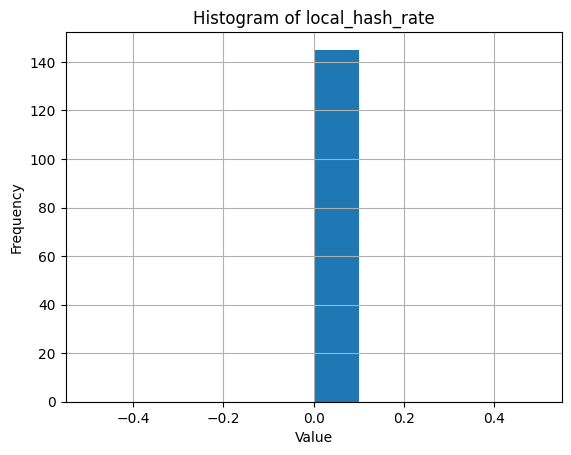



-----  normal_reward  -----
count    145.0
mean       0.0
std        0.0
min        0.0
25%        0.0
50%        0.0
75%        0.0
max        0.0
Name: normal_reward, dtype: float64


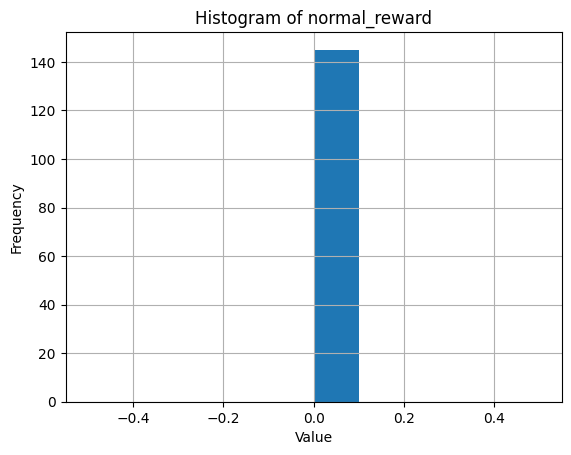



-----  delay_reward  -----
count    145.0
mean       0.0
std        0.0
min        0.0
25%        0.0
50%        0.0
75%        0.0
max        0.0
Name: delay_reward, dtype: float64


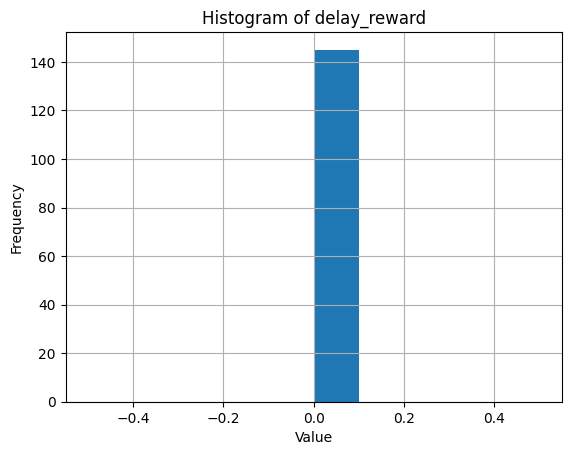



-----  online_miners  -----
count    145.000000
mean       0.889655
std        0.314405
min        0.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: online_miners, dtype: float64


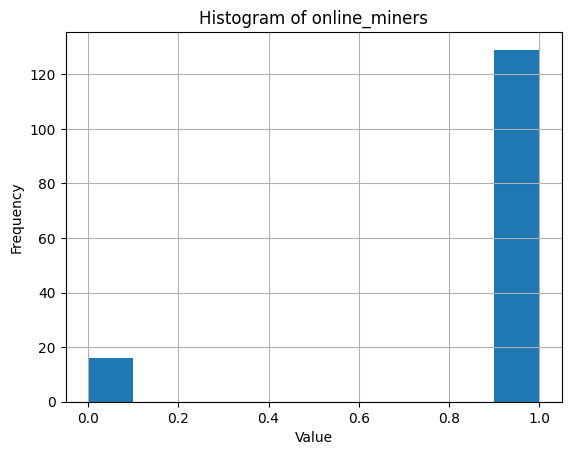

In [56]:
for col in num_cols:
  print('----- ', col, ' -----')
  print(history_df[col].describe())
  history_df[col].hist()
  plt.title(f'Histogram of {col}')
  plt.xlabel('Value')
  plt.ylabel('Frequency')
  plt.show()
  print('\n')

In [57]:
num_cols, obj_cols, bool_cols = find_column_datatypes(transactions_df)

In [58]:
num_cols

['id',
 'changed_balance',
 'created_at',
 'mining_extra.mining_date',
 'mining_extra.settle_date',
 'mining_extra.pps',
 'mining_extra.pps_fee_rate',
 'mining_extra.tx_fee',
 'mining_extra.tx_fee_rate',
 'mining_extra.hash_rate']

In [59]:
obj_cols

['type', 'payout_extra']

-----  id  -----
count    2.010000e+02
mean     9.006289e+07
std      4.647481e+06
min      8.191030e+07
25%      8.610630e+07
50%      9.005564e+07
75%      9.410781e+07
max      9.789319e+07
Name: id, dtype: float64


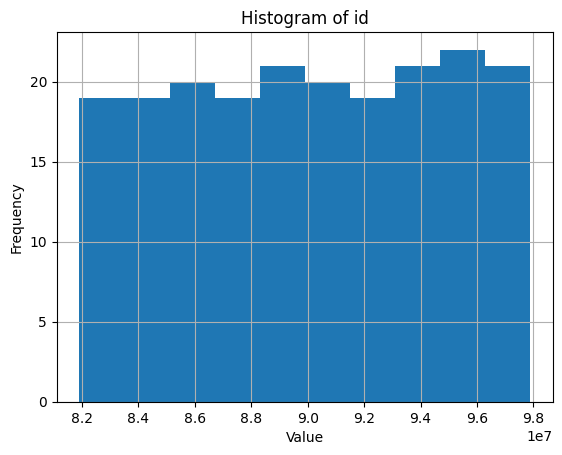



-----  changed_balance  -----
count    201.000000
mean       0.000159
std        0.000031
min        0.000003
25%        0.000147
50%        0.000159
75%        0.000173
max        0.000293
Name: changed_balance, dtype: float64


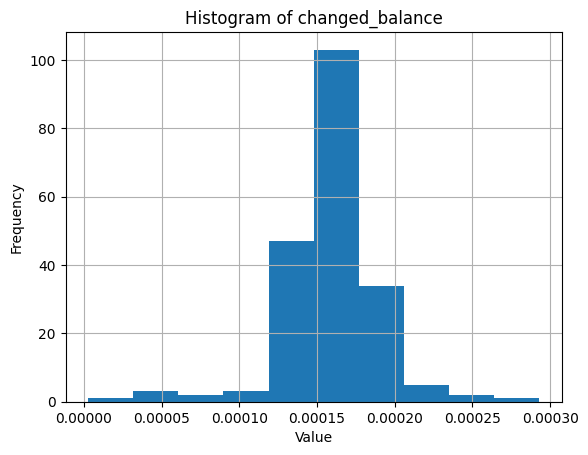



-----  created_at  -----
count    2.010000e+02
mean     1.689980e+09
std      5.168270e+06
min      1.681180e+09
25%      1.685499e+09
50%      1.689906e+09
75%      1.694484e+09
max      1.698805e+09
Name: created_at, dtype: float64


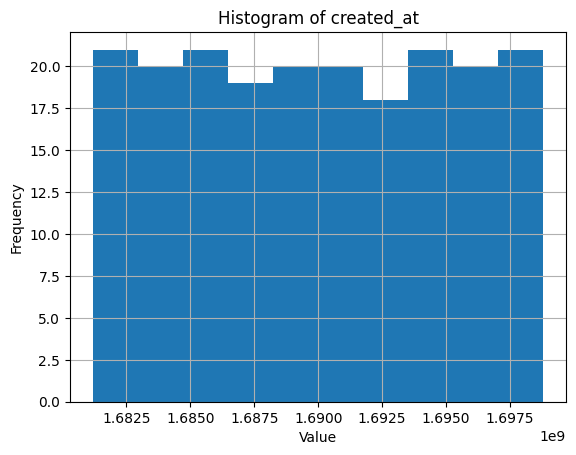



-----  mining_extra.mining_date  -----
count    2.010000e+02
mean     1.689972e+09
std      5.168295e+06
min      1.681171e+09
25%      1.685491e+09
50%      1.689898e+09
75%      1.694477e+09
max      1.698797e+09
Name: mining_extra.mining_date, dtype: float64


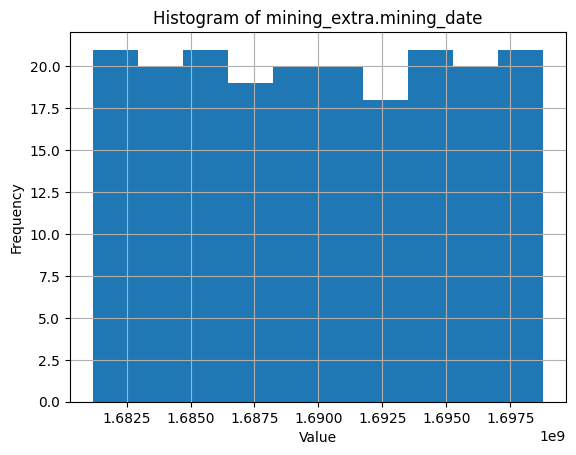



-----  mining_extra.settle_date  -----
count    2.010000e+02
mean     1.689980e+09
std      5.168270e+06
min      1.681180e+09
25%      1.685499e+09
50%      1.689906e+09
75%      1.694484e+09
max      1.698805e+09
Name: mining_extra.settle_date, dtype: float64


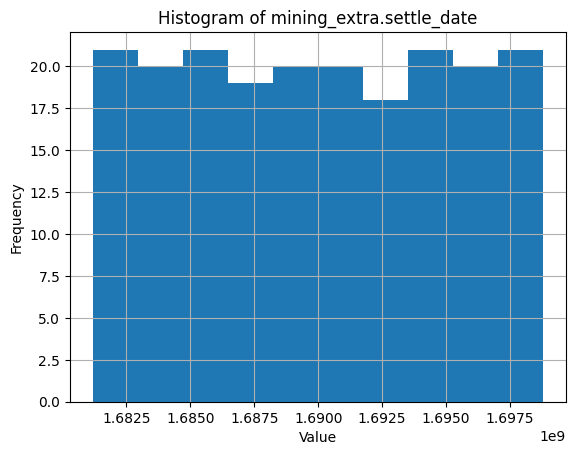



-----  mining_extra.pps  -----
count    201.000000
mean       0.000151
std        0.000024
min        0.000003
25%        0.000143
50%        0.000154
75%        0.000167
max        0.000183
Name: mining_extra.pps, dtype: float64


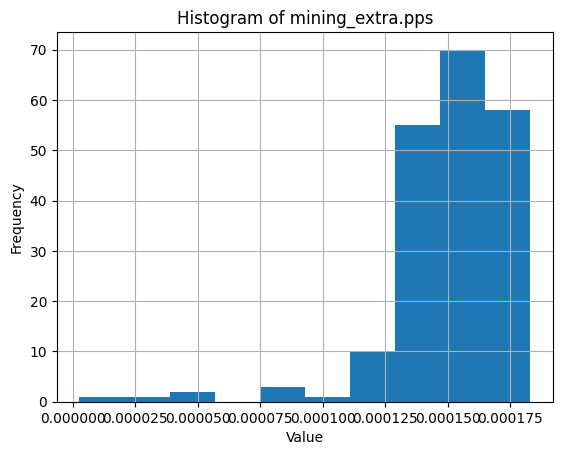



-----  mining_extra.pps_fee_rate  -----
count    201.000000
mean       0.029552
std        0.006914
min        0.025000
25%        0.025000
50%        0.025000
75%        0.040000
max        0.040000
Name: mining_extra.pps_fee_rate, dtype: float64


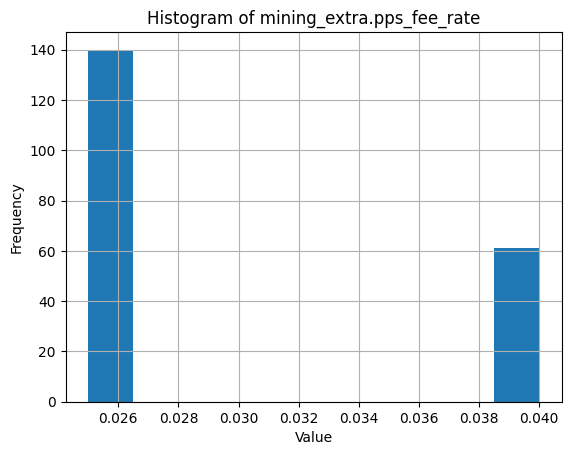



-----  mining_extra.tx_fee  -----
count    2.010000e+02
mean     7.926156e-06
std      1.297824e-05
min      4.385015e-08
25%      2.960939e-06
50%      4.338712e-06
75%      7.401124e-06
max      1.247583e-04
Name: mining_extra.tx_fee, dtype: float64


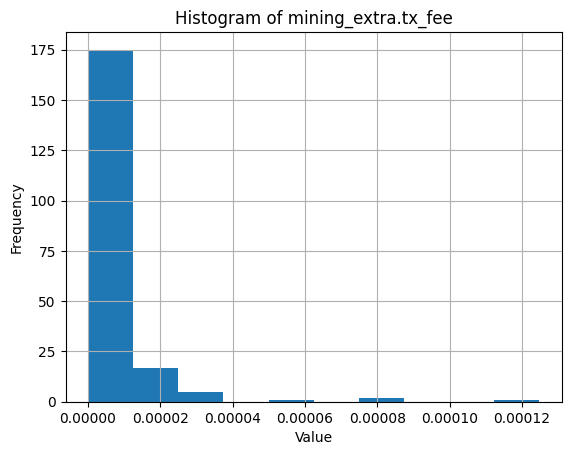



-----  mining_extra.tx_fee_rate  -----
count    201.000000
mean       0.029552
std        0.006914
min        0.025000
25%        0.025000
50%        0.025000
75%        0.040000
max        0.040000
Name: mining_extra.tx_fee_rate, dtype: float64


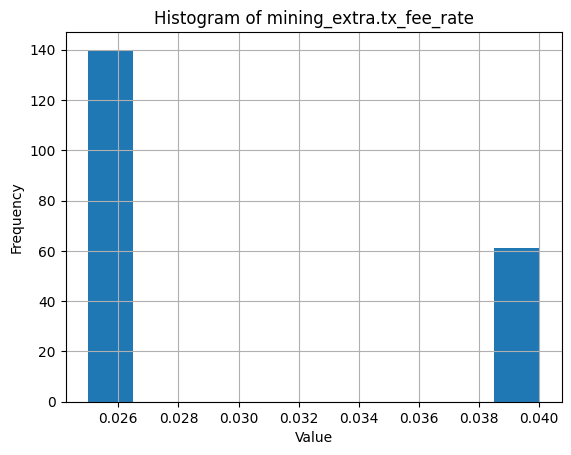



-----  mining_extra.hash_rate  -----
count    2.010000e+02
mean     6.529405e+13
std      9.723408e+12
min      1.146750e+12
25%      6.670371e+13
50%      6.847270e+13
75%      6.967809e+13
max      7.287074e+13
Name: mining_extra.hash_rate, dtype: float64


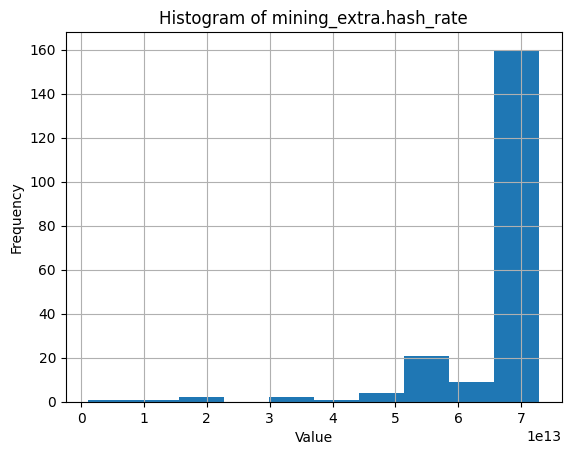

In [60]:
for col in num_cols:
  print('----- ', col, ' -----')
  print(transactions_df[col].describe())
  transactions_df[col].hist()
  plt.title(f'Histogram of {col}')
  plt.xlabel('Value')
  plt.ylabel('Frequency')
  plt.show()
  print('\n')

-----  type  -----
count              201
unique               2
top       revenue_fpps
freq               116
Name: type, dtype: object


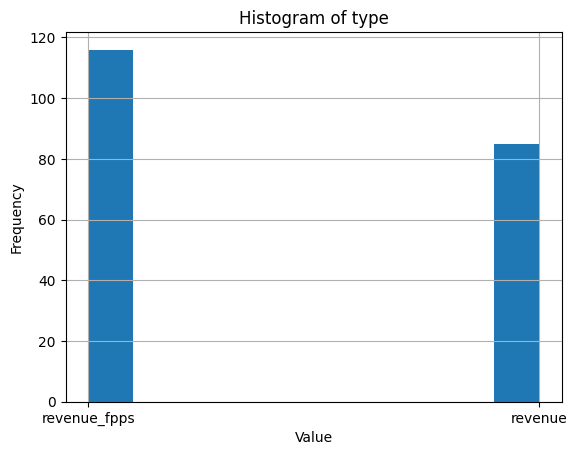



-----  payout_extra  -----
count       0
unique      0
top       NaN
freq      NaN
Name: payout_extra, dtype: object


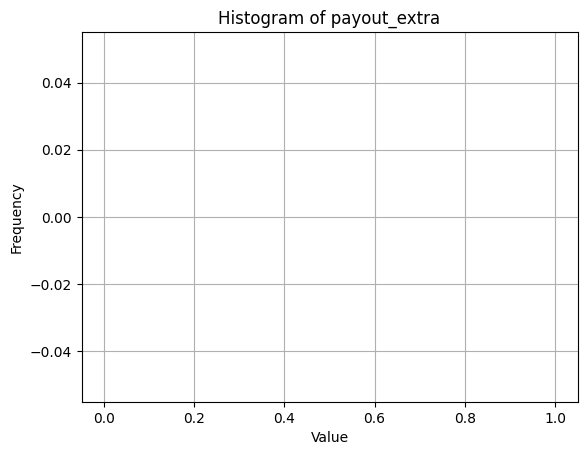

In [61]:
for col in obj_cols:
  print('----- ', col, ' -----')
  print(transactions_df[col].describe())
  transactions_df[col].hist()
  plt.title(f'Histogram of {col}')
  plt.xlabel('Value')
  plt.ylabel('Frequency')
  plt.show()
  print('\n')

In [62]:
history_df.shape

(145, 8)

In [63]:
transactions_df.shape

(201, 12)